# Load sat data

In [21]:
import xarray as xr
import numpy as np

data_dir = 'D:/VScode/Last_deglaciation/data'
ds_sat_EOFs_MC = xr.open_dataset(data_dir + '/ds_sat_EOFs_MC.nc')

weight = np.cos(np.deg2rad(ds_sat_EOFs_MC['lat']))
weight = xr.where(weight < 0, 0, weight)

ds_sat_EOFs_MC['weight']=weight

ds_sat_EOFs_MC.info

<bound method Dataset.info of <xarray.Dataset>
Dimensions:                (age: 65, lat: 96, lon: 144)
Coordinates:
  * lat                    (lat) float32 -90.0 -88.11 -86.21 ... 88.11 90.0
  * lon                    (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * age                    (age) float32 1.11e+04 1.13e+04 ... 2.37e+04 2.39e+04
Data variables:
    sat                    (age, lat, lon) float32 ...
    sat_std                (age, lat, lon) float32 ...
    sat_centered           (age, lat, lon) float32 ...
    sat_centered_weighted  (age, lat, lon) float32 ...
    EOF1                   (lat, lon) float32 ...
    EOF2                   (lat, lon) float32 ...
    class_label            (lat, lon) int64 ...
    weight                 (lat) float32 0.0 0.03306 0.06609 ... 0.03306 0.0>

# Load intergrated annual insolation data

In [2]:
path='D:/VScode/Last_deglaciation/data_fig3/'

# read Huybers P &Denton-2008-NGeo-65S.txt
import pandas as pd
df_inter_ann = pd.read_csv(path + 'Huybers_Denton_2008_NGeo_65S.txt', sep='\s+', header=0,skiprows=8)
# rename column NaN to age
df_inter_ann.rename(columns={'NaN':'age'}, inplace=True)
# age culumn to ka
df_inter_ann['age']=df_inter_ann['age']*1000

# IAinso=np.array([df_inter_ann['age'].values,df_inter_ann['275'].values])  
# IAinso=IAinso[:,IAinso[0,:]>0].T
# IAinso[:,0]=IAinso[:,0]*1000


df_inter_ann.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5001 entries, 0 to 5000
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     5001 non-null   int64  
 1   0       5001 non-null   float64
 2   25      5001 non-null   float64
 3   50      5001 non-null   float64
 4   75      5001 non-null   float64
 5   100     5001 non-null   float64
 6   125     5001 non-null   float64
 7   150     5001 non-null   float64
 8   175     5001 non-null   float64
 9   200     5001 non-null   float64
 10  225     5001 non-null   float64
 11  250     5001 non-null   float64
 12  275     5001 non-null   float64
 13  300     5001 non-null   float64
 14  325     5001 non-null   float64
 15  350     5001 non-null   float64
 16  375     5001 non-null   float64
 17  400     5001 non-null   float64
 18  425     5001 non-null   float64
 19  450     5001 non-null   float64
 20  475     5001 non-null   float64
 21  500     5001 non-null   float64
 22  

In [34]:
IAinso.shape

(5000, 2)

# Center and weight data

In [23]:
path='D:/VScode/Last_deglaciation/data/LGMR_SIC_May2023.nc'

# read the nc file from the path
import xarray as xr
import numpy as np

ds_seaice = xr.open_dataset(path)
ds_seaice = ds_seaice.where(ds_seaice.age>=11000, drop=True)

# Calculate the mean of sic along the 'age' dimension
mean_sic = ds_seaice['sic'].isel(dims=1).mean(dim='age')
centered_sic = ds_seaice['sic'].isel(dims=1) - mean_sic
ds_seaice['sic_centered'] = centered_sic


# Calculate the weight based on latitude
weight = np.cos(np.deg2rad(ds_seaice['lat']))
print('shape of the weight:', weight.shape)

weight = xr.where(weight < 0, 0, weight)

ds_seaice['weight'] = weight
sic_centered_weighted = ds_seaice['sic_centered'] * ds_seaice['weight']
ds_seaice['sic_centered_weighted'] = sic_centered_weighted



ds_seaice.info

shape of the weight: (96,)


c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv
c:\Users\zps19\.conda\envs\pz-env\lib\site-packages\xarray\coding\variables.py:148: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  condition |= data == fv


<bound method Dataset.info of <xarray.Dataset>
Dimensions:                (dims: 5, age: 65, lat: 96, lon: 144)
Coordinates:
  * lat                    (lat) float32 -90.0 -88.11 -86.21 ... 88.11 90.0
  * lon                    (lon) float32 0.0 2.5 5.0 7.5 ... 352.5 355.0 357.5
  * age                    (age) float32 1.11e+04 1.13e+04 ... 2.37e+04 2.39e+04
  * dims                   (dims) object 'mean              ' ... '97.5percen...
Data variables:
    sic                    (dims, age, lat, lon) float32 0.0 0.0 ... 0.9979
    sic_centered           (age, lat, lon) float32 0.0 0.0 ... 0.01157 0.01154
    weight                 (lat) float32 0.0 0.03306 0.06609 ... 0.03306 0.0
    sic_centered_weighted  (age, lat, lon) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0>

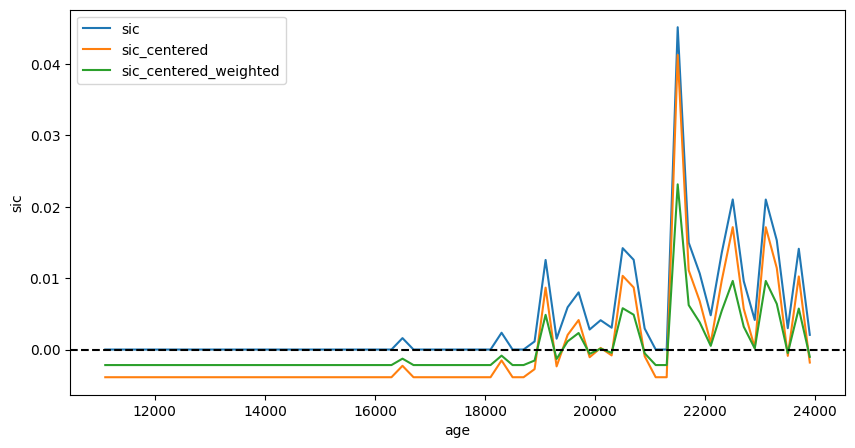

In [24]:
# plot the sat, sat_centered, and sat_centered_weighted in the same plot for lat=0 and lon=0
import matplotlib.pyplot as plt


fig, ax = plt.subplots(figsize=(10, 5))

ax.plot(ds_seaice['age'], ds_seaice['sic'].isel(dims=1)[:, 77, 90], label='sic')
ax.plot(ds_seaice['age'], ds_seaice['sic_centered'][:, 77, 90], label='sic_centered')
ax.plot(ds_seaice['age'], ds_seaice['sic_centered_weighted'][:, 77, 90], label='sic_centered_weighted')
# plot a line at y=0
ax.axhline(y=0, color='black', linestyle='--')

ax.set_xlabel('age')
ax.set_ylabel('sic')
ax.legend()

plt.show()

# Calculate the weighted average curve

In [25]:
import xarray as xr

ds_sat_subset = ds_sat_EOFs_MC.sel(lat=slice(-75, -60))
ds_seaice_subset = ds_seaice.sel(lat=slice(-75, -60))


weights_broadcasted = ds_sat_subset['weight'].broadcast_like(ds_sat_subset['sat'])
sum_weighted_sat = (ds_sat_subset['sat'] * weights_broadcasted).sum(dim=['lat', 'lon'])
sum_weight_sat = weights_broadcasted.sum(dim=['lat', 'lon'])

weighted_avg_sat = sum_weighted_sat / sum_weight_sat



# Calculate the area of sea ice cover

In [26]:
import numpy as np

# Constants
R = 6371  # Earth's radius in km
delta_lambda = 2.5  # longitudinal width in degrees

# Convert latitude values to radians
lat_radians = np.radians(ds_seaice_subset['lat'].values)

# Compute latitudinal boundaries
lat_boundaries = (lat_radians[:-1] + lat_radians[1:]) / 2


lat_boundaries = np.insert(lat_boundaries, 0, -np.pi/2)  # add South Pole
lat_boundaries = np.append(lat_boundaries, np.pi/2)  # add North Pole

# Compute the area of each grid cell
delta_phi = np.diff(lat_boundaries)
area_grid = 2 * np.pi * R**2 * np.outer(delta_phi, delta_lambda / 360)

# Multiply sea ice concentration by the grid cell areas to get sea ice cover
sea_ice_cover = ds_seaice_subset['sic'].isel(dims=1) * area_grid

# Sum over the lat and lon dimensions to get the total sea ice cover for the entire region
total_sea_ice_cover = sea_ice_cover.sum(dim=['lat', 'lon'])



# Plot the average T curve and sea ice cover

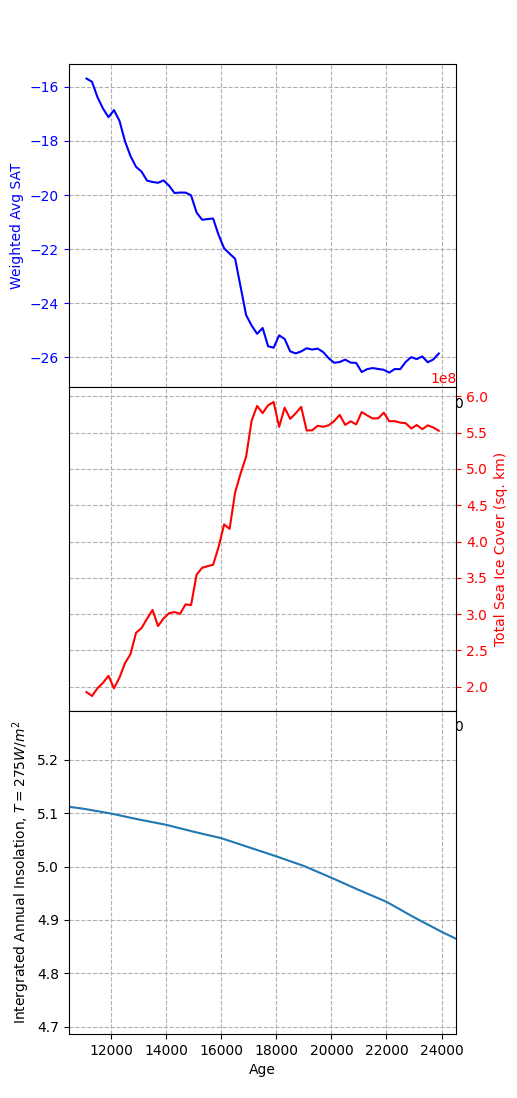

In [27]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Assuming you've already computed weighted_avg_sat, total_sea_ice_cover, and df_inter_ann

# Create a new figure
fig, main_ax = plt.subplots(figsize=(5, 14), dpi=100)
main_ax.axis('off')  # Turn off the main axis

# Create the inset for the Weighted Avg SAT plot
ax1 = inset_axes(main_ax, width='100%', height='100%', 
                 bbox_to_anchor=(0.05, 0.65, 1, 0.3), 
                 bbox_transform=main_ax.transAxes, borderpad=0)
ax1.plot(weighted_avg_sat['age'], weighted_avg_sat, 'b-', label="Weighted Avg SAT")
ax1.set_xlabel('Age')
ax1.set_ylabel('Weighted Avg SAT', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(True, which="both", ls="--", axis="both")

# Create the inset for the Total Sea Ice Cover plot
ax2 = inset_axes(main_ax, width='100%', height='100%', 
                 bbox_to_anchor=(0.05, 0.35, 1, 0.3), 
                 bbox_transform=main_ax.transAxes, borderpad=0)
ax2.plot(total_sea_ice_cover['age'], total_sea_ice_cover, 'r-', label="Total Sea Ice Cover")
ax2.set_xlabel('Age')
ax2.set_ylabel('Total Sea Ice Cover (sq. km)', color='r')
ax2.tick_params('y', colors='r')
ax2.grid(True, which="both", ls="--", axis="both")
# show labels and ticks on the right side of the inset
ax2.yaxis.tick_right()
ax2.yaxis.set_label_position("right")

# Create the inset for the df_inter_ann data
ax3 = inset_axes(main_ax, width='100%', height='100%', 
                 bbox_to_anchor=(0.05, 0.05, 1, 0.3), 
                 bbox_transform=main_ax.transAxes, borderpad=0)

ax3.plot(df_inter_ann['age'], df_inter_ann['275'])
# for column in df_inter_ann.columns:
#     if column != 'age':
#         ax3.plot(df_inter_ann['age'], df_inter_ann[column], label=column)

ax3.set_xlabel('Age')
# ax3.set_ylabel('Intergrated Annual Insolation, T=275 W/m^2')
# rewrite the line above, show the unit in upper script
ax3.set_ylabel('Intergrated Annual Insolation, $T=275 W/m^2$')
ax3.grid(True, which="both", ls="--", axis="both")
ax3.set_xlim(ax1.get_xlim())  # Set x-axis limits same as ax1
# Uncomment the following line if you want to add a legend for df_inter_ann lines. 
# ax3.legend()

plt.show()


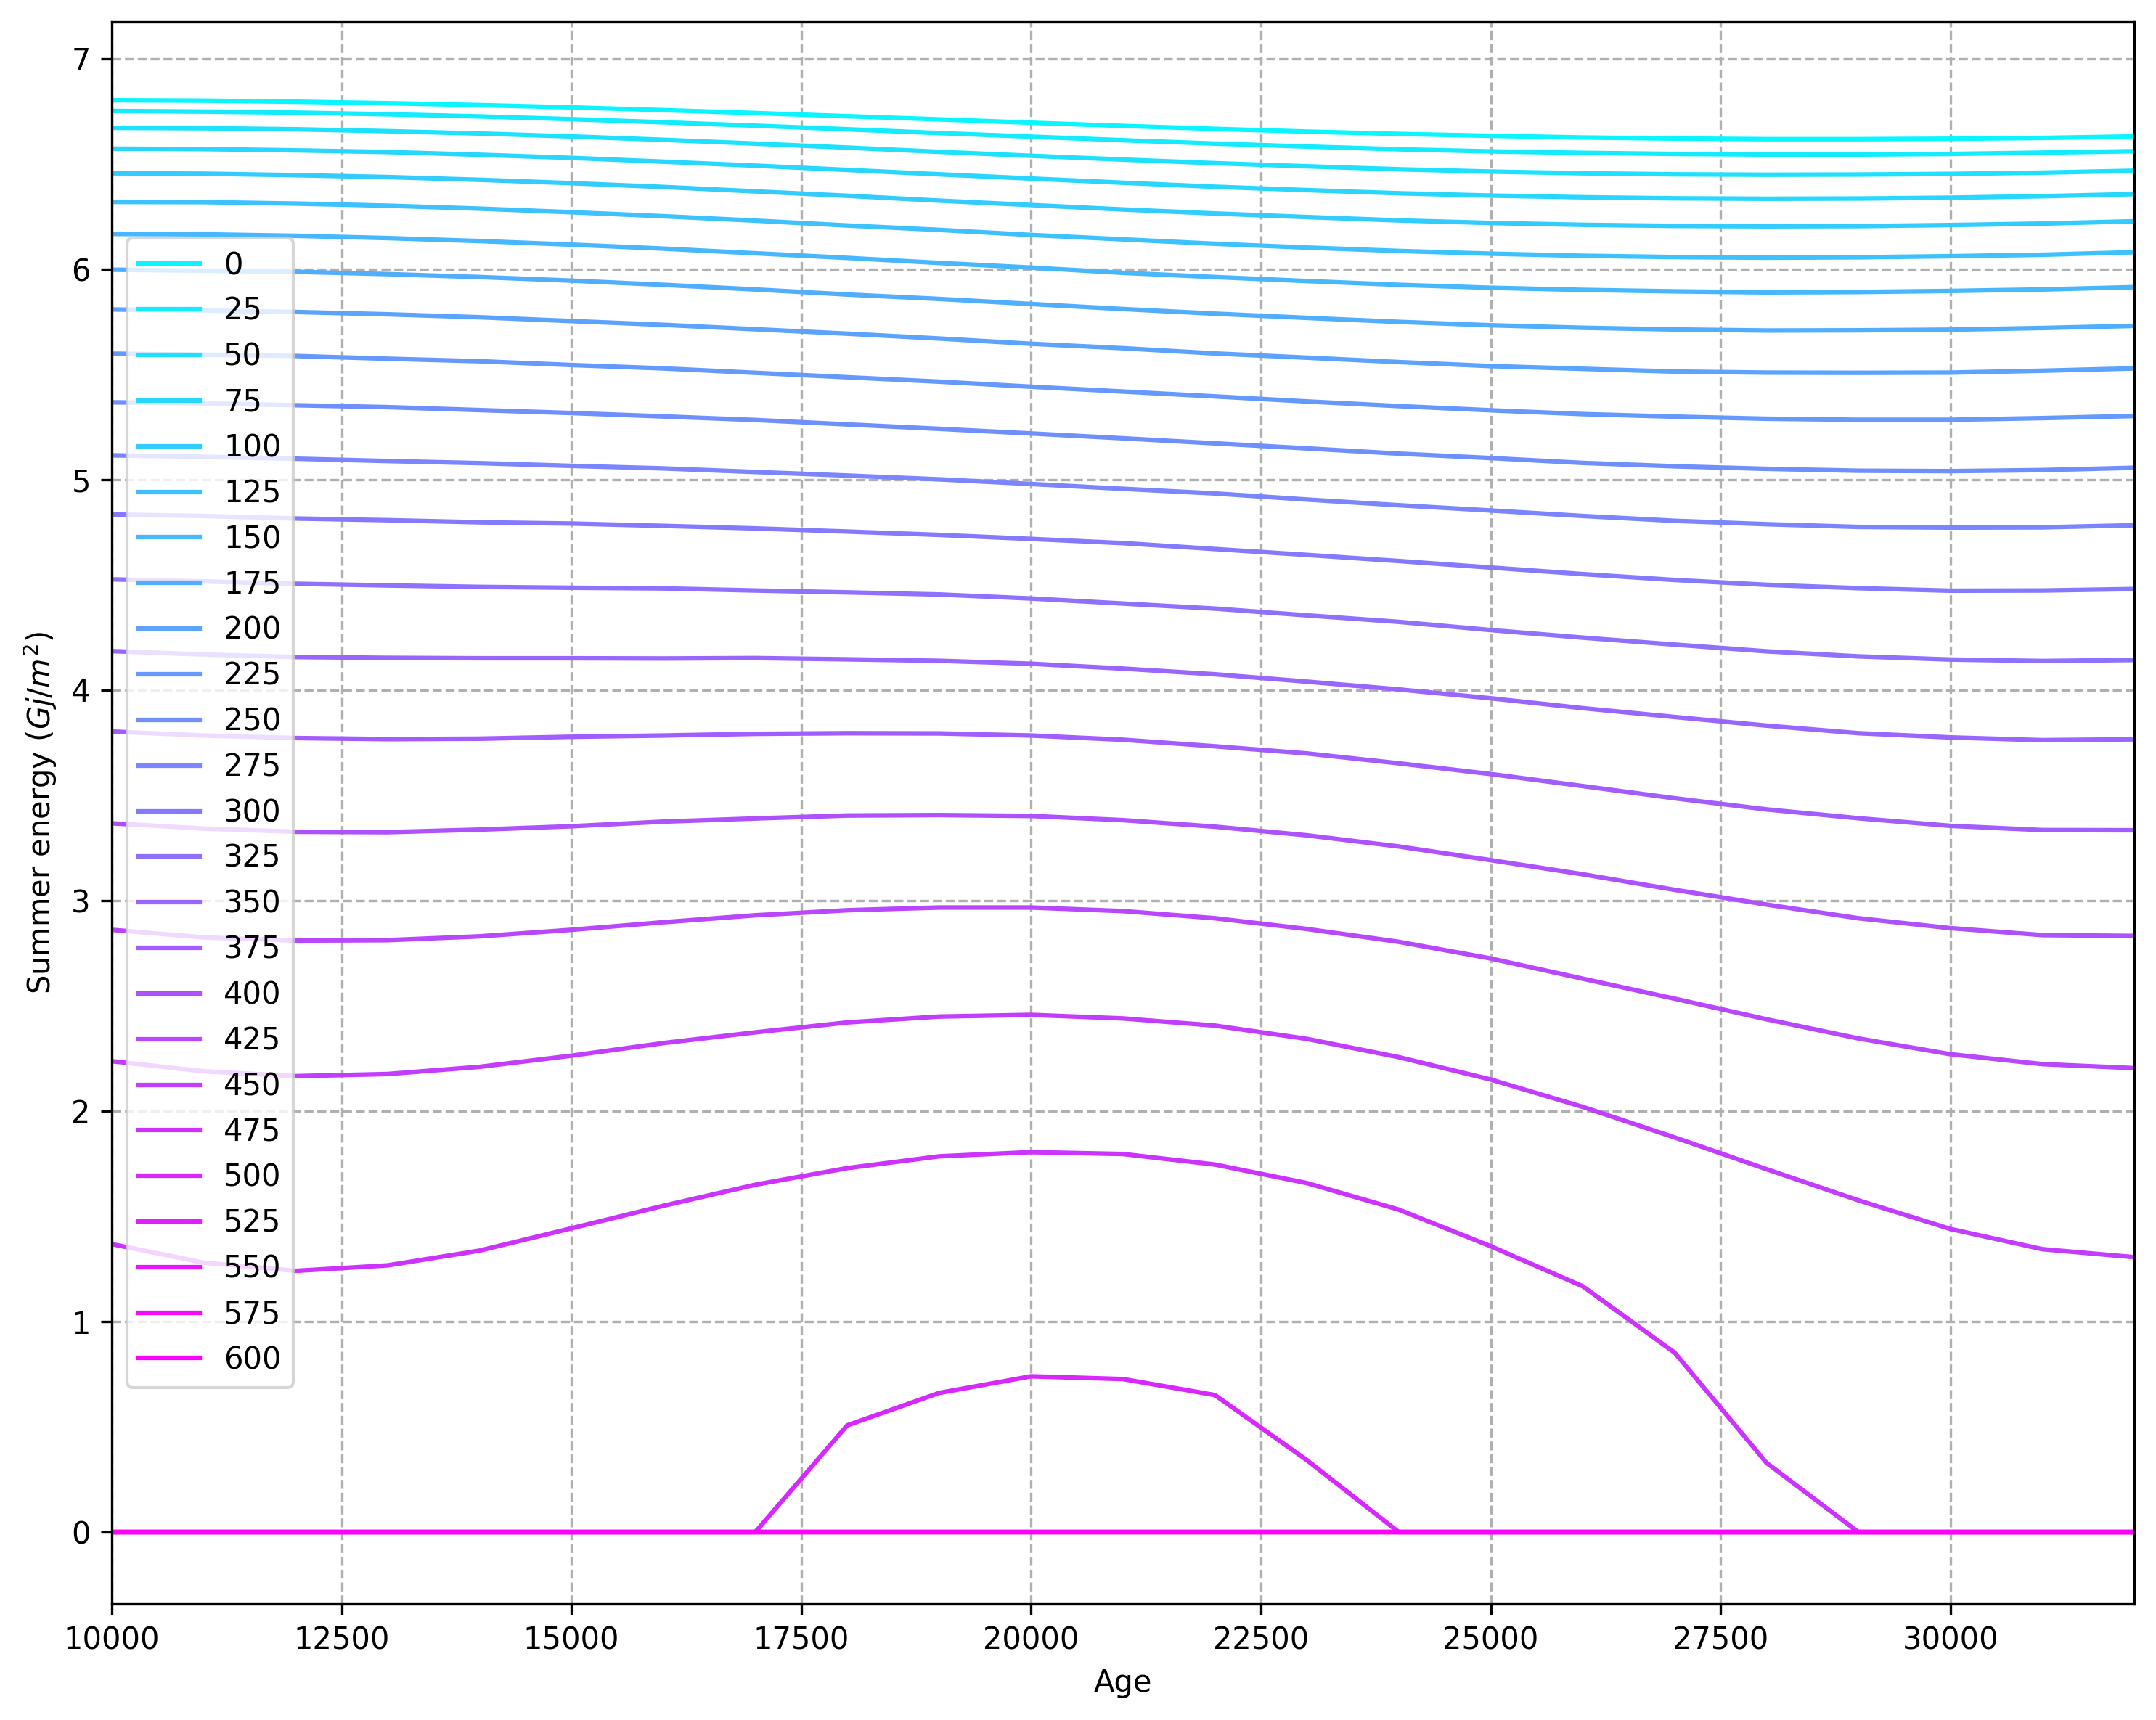

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_inter_ann is already loaded

fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

# Get the 'bwr' colormap
cmap = plt.cm.cool
# Calculate the step size to use for each column
color_step = 1.0 / (len(df_inter_ann.columns) - 1)

# Loop through the columns in df_inter_ann and plot each one
for idx, column in enumerate(df_inter_ann.columns):
    if column != 'age':
        # Get the color from the colormap
        color = cmap(idx * color_step)
        ax.plot(df_inter_ann['age'], df_inter_ann[column], color=color, label=column)

ax.set_xlabel('Age')
ax.set_ylabel('Summer energy $(Gj/m^2)$')
ax.set_xlim(10000, 32000)  # Set x-axis limits
ax.grid(True, which="both", ls="--", axis="both")

# Add a legend if you want to differentiate between the lines
ax.legend()

plt.tight_layout()
plt.show()


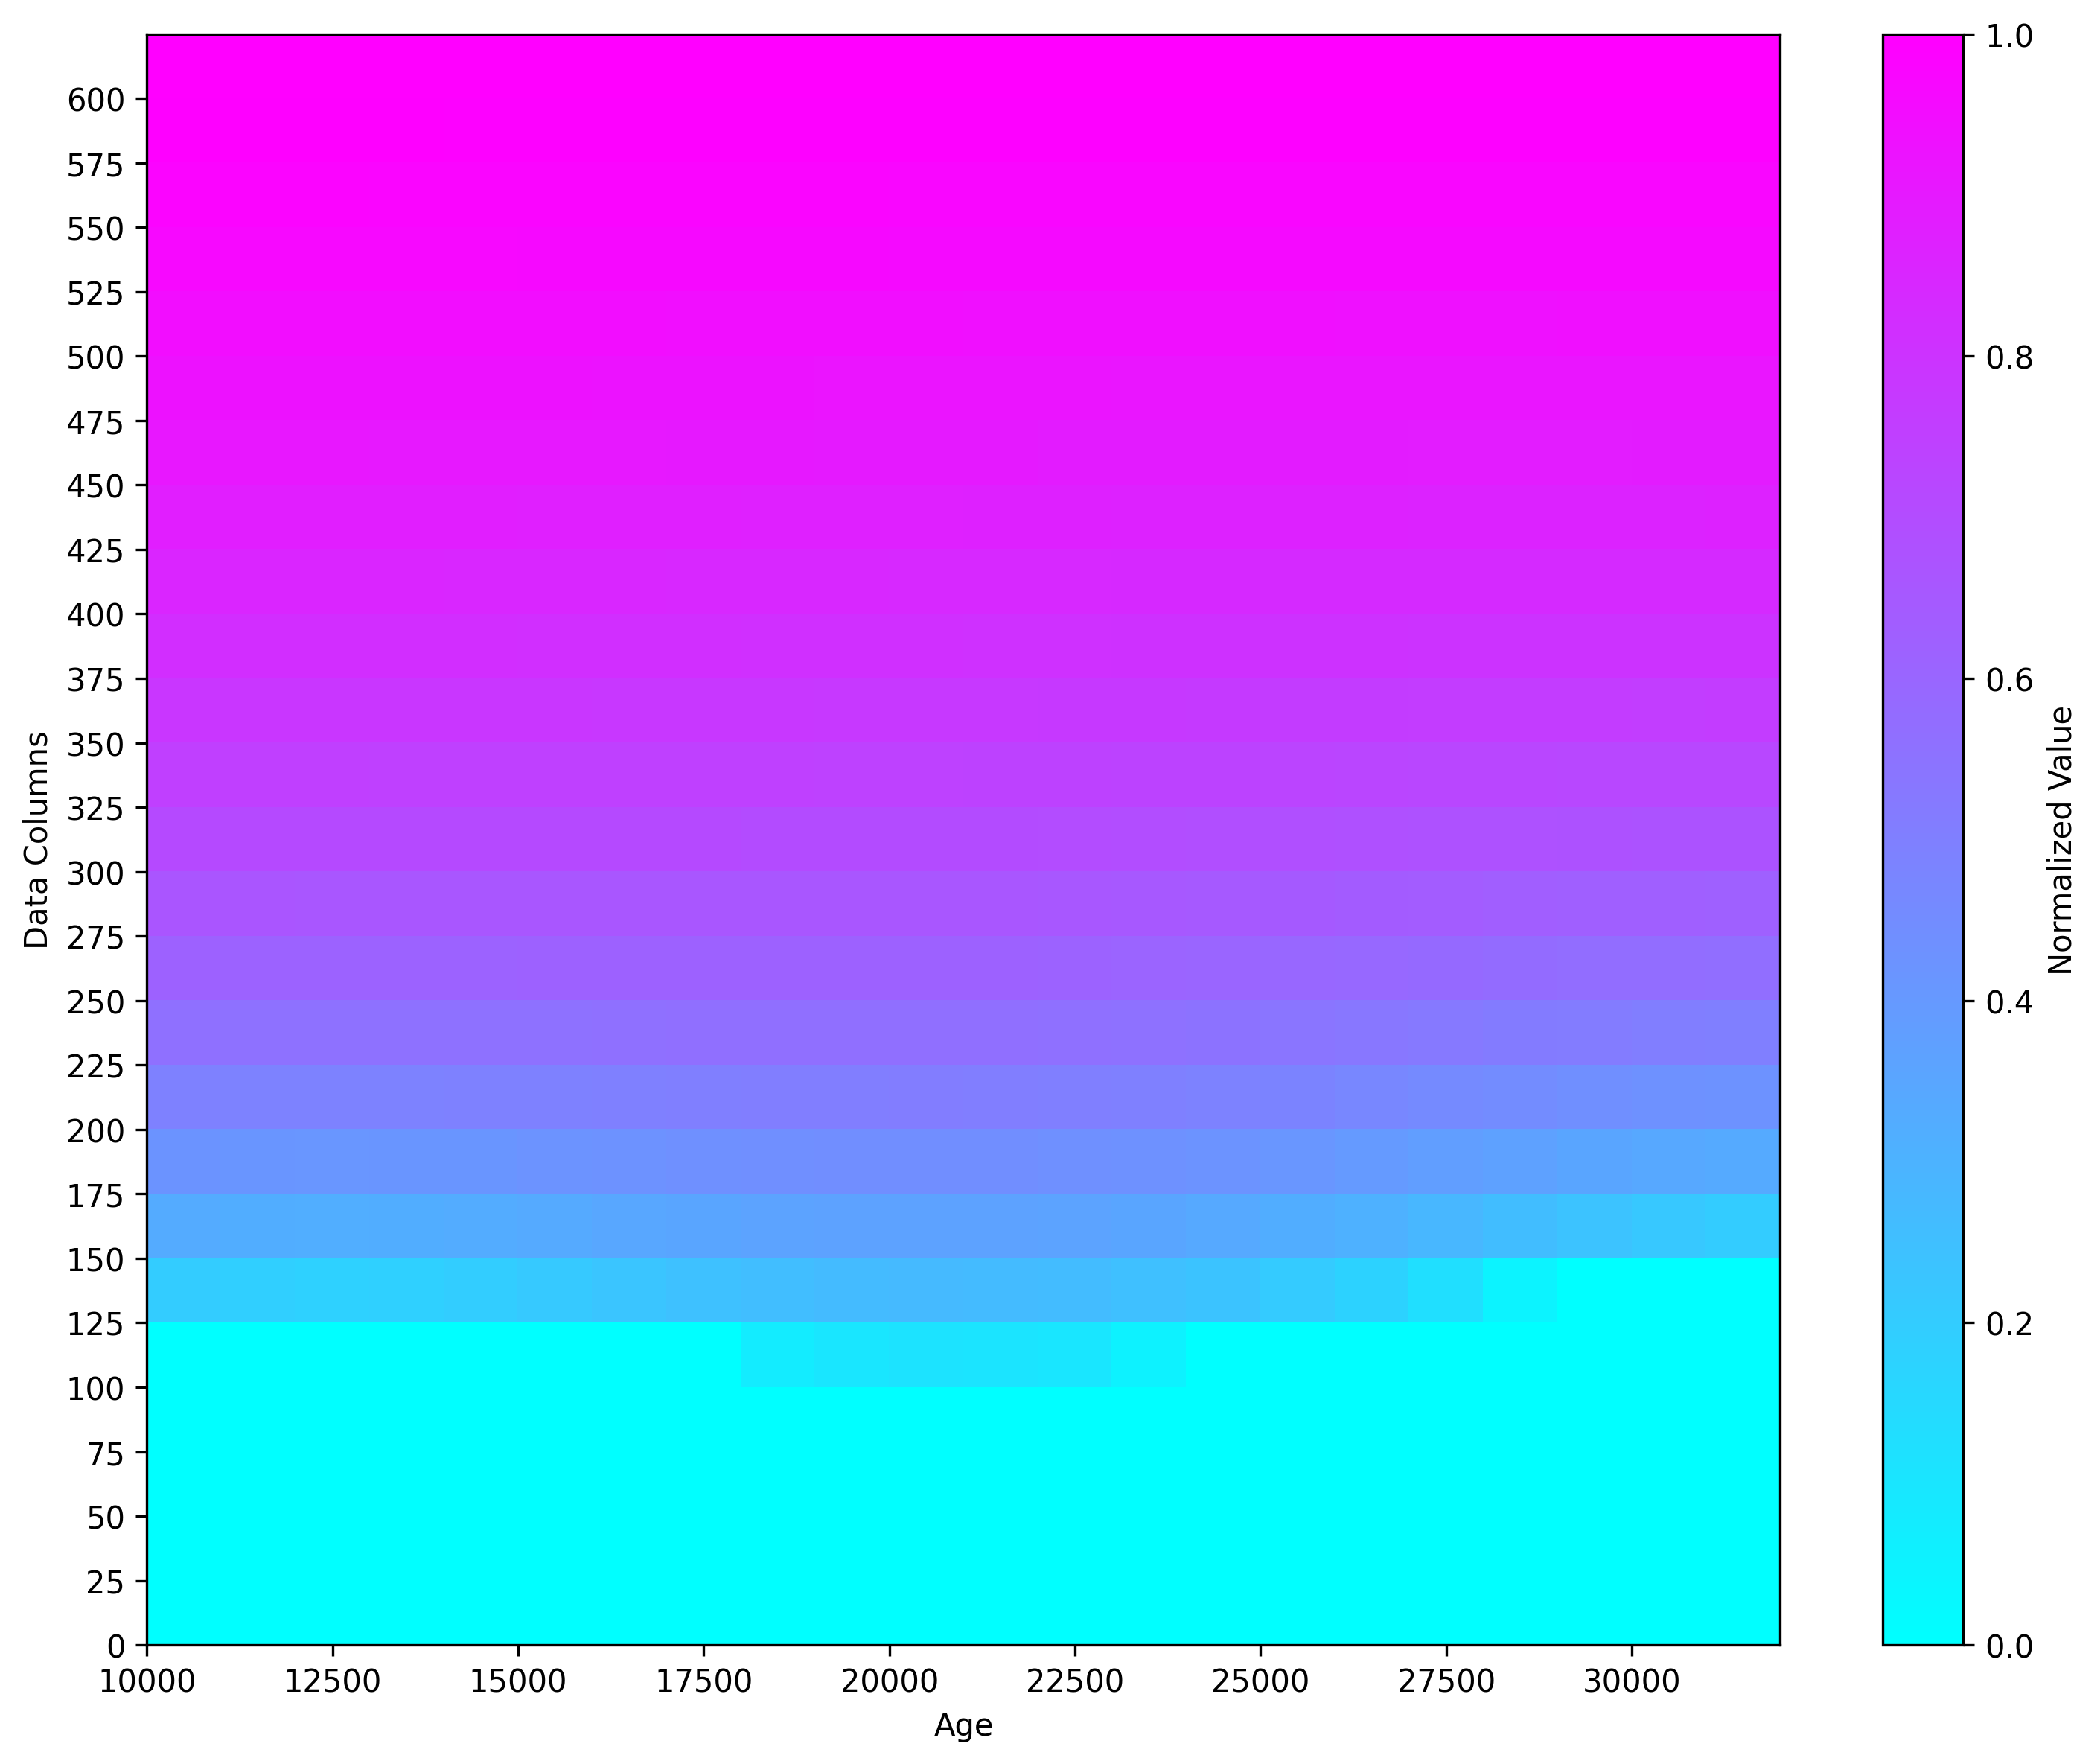

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


# Removing 'age' column for plotting, and transposing the dataframe for correct orientation
data_for_heatmap = df_inter_ann.drop(columns='age').transpose()

# Normalizing data to be in [0, 1] for proper color mapping
normalized_data = (data_for_heatmap - data_for_heatmap.min()) / (data_for_heatmap.max() - data_for_heatmap.min())

# Creating a figure and axis object
fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

# Creating the heatmap
cax = ax.imshow(normalized_data, aspect='auto', cmap='cool', extent=[df_inter_ann['age'].min(), df_inter_ann['age'].max(), 0, len(data_for_heatmap)])

# Setting the y-axis ticks to correspond to the columns of df_inter_ann
ax.set_yticks(np.arange(len(data_for_heatmap.index)))
ax.set_yticklabels(data_for_heatmap.index)
# set xlim
ax.set_xlim(10000, 32000)

ax.set_xlabel('Age')
ax.set_ylabel('Data Columns')
ax.grid(False)

# Adding a colorbar
fig.colorbar(cax, ax=ax, orientation='vertical', label='Normalized Value')

plt.tight_layout()
plt.show()


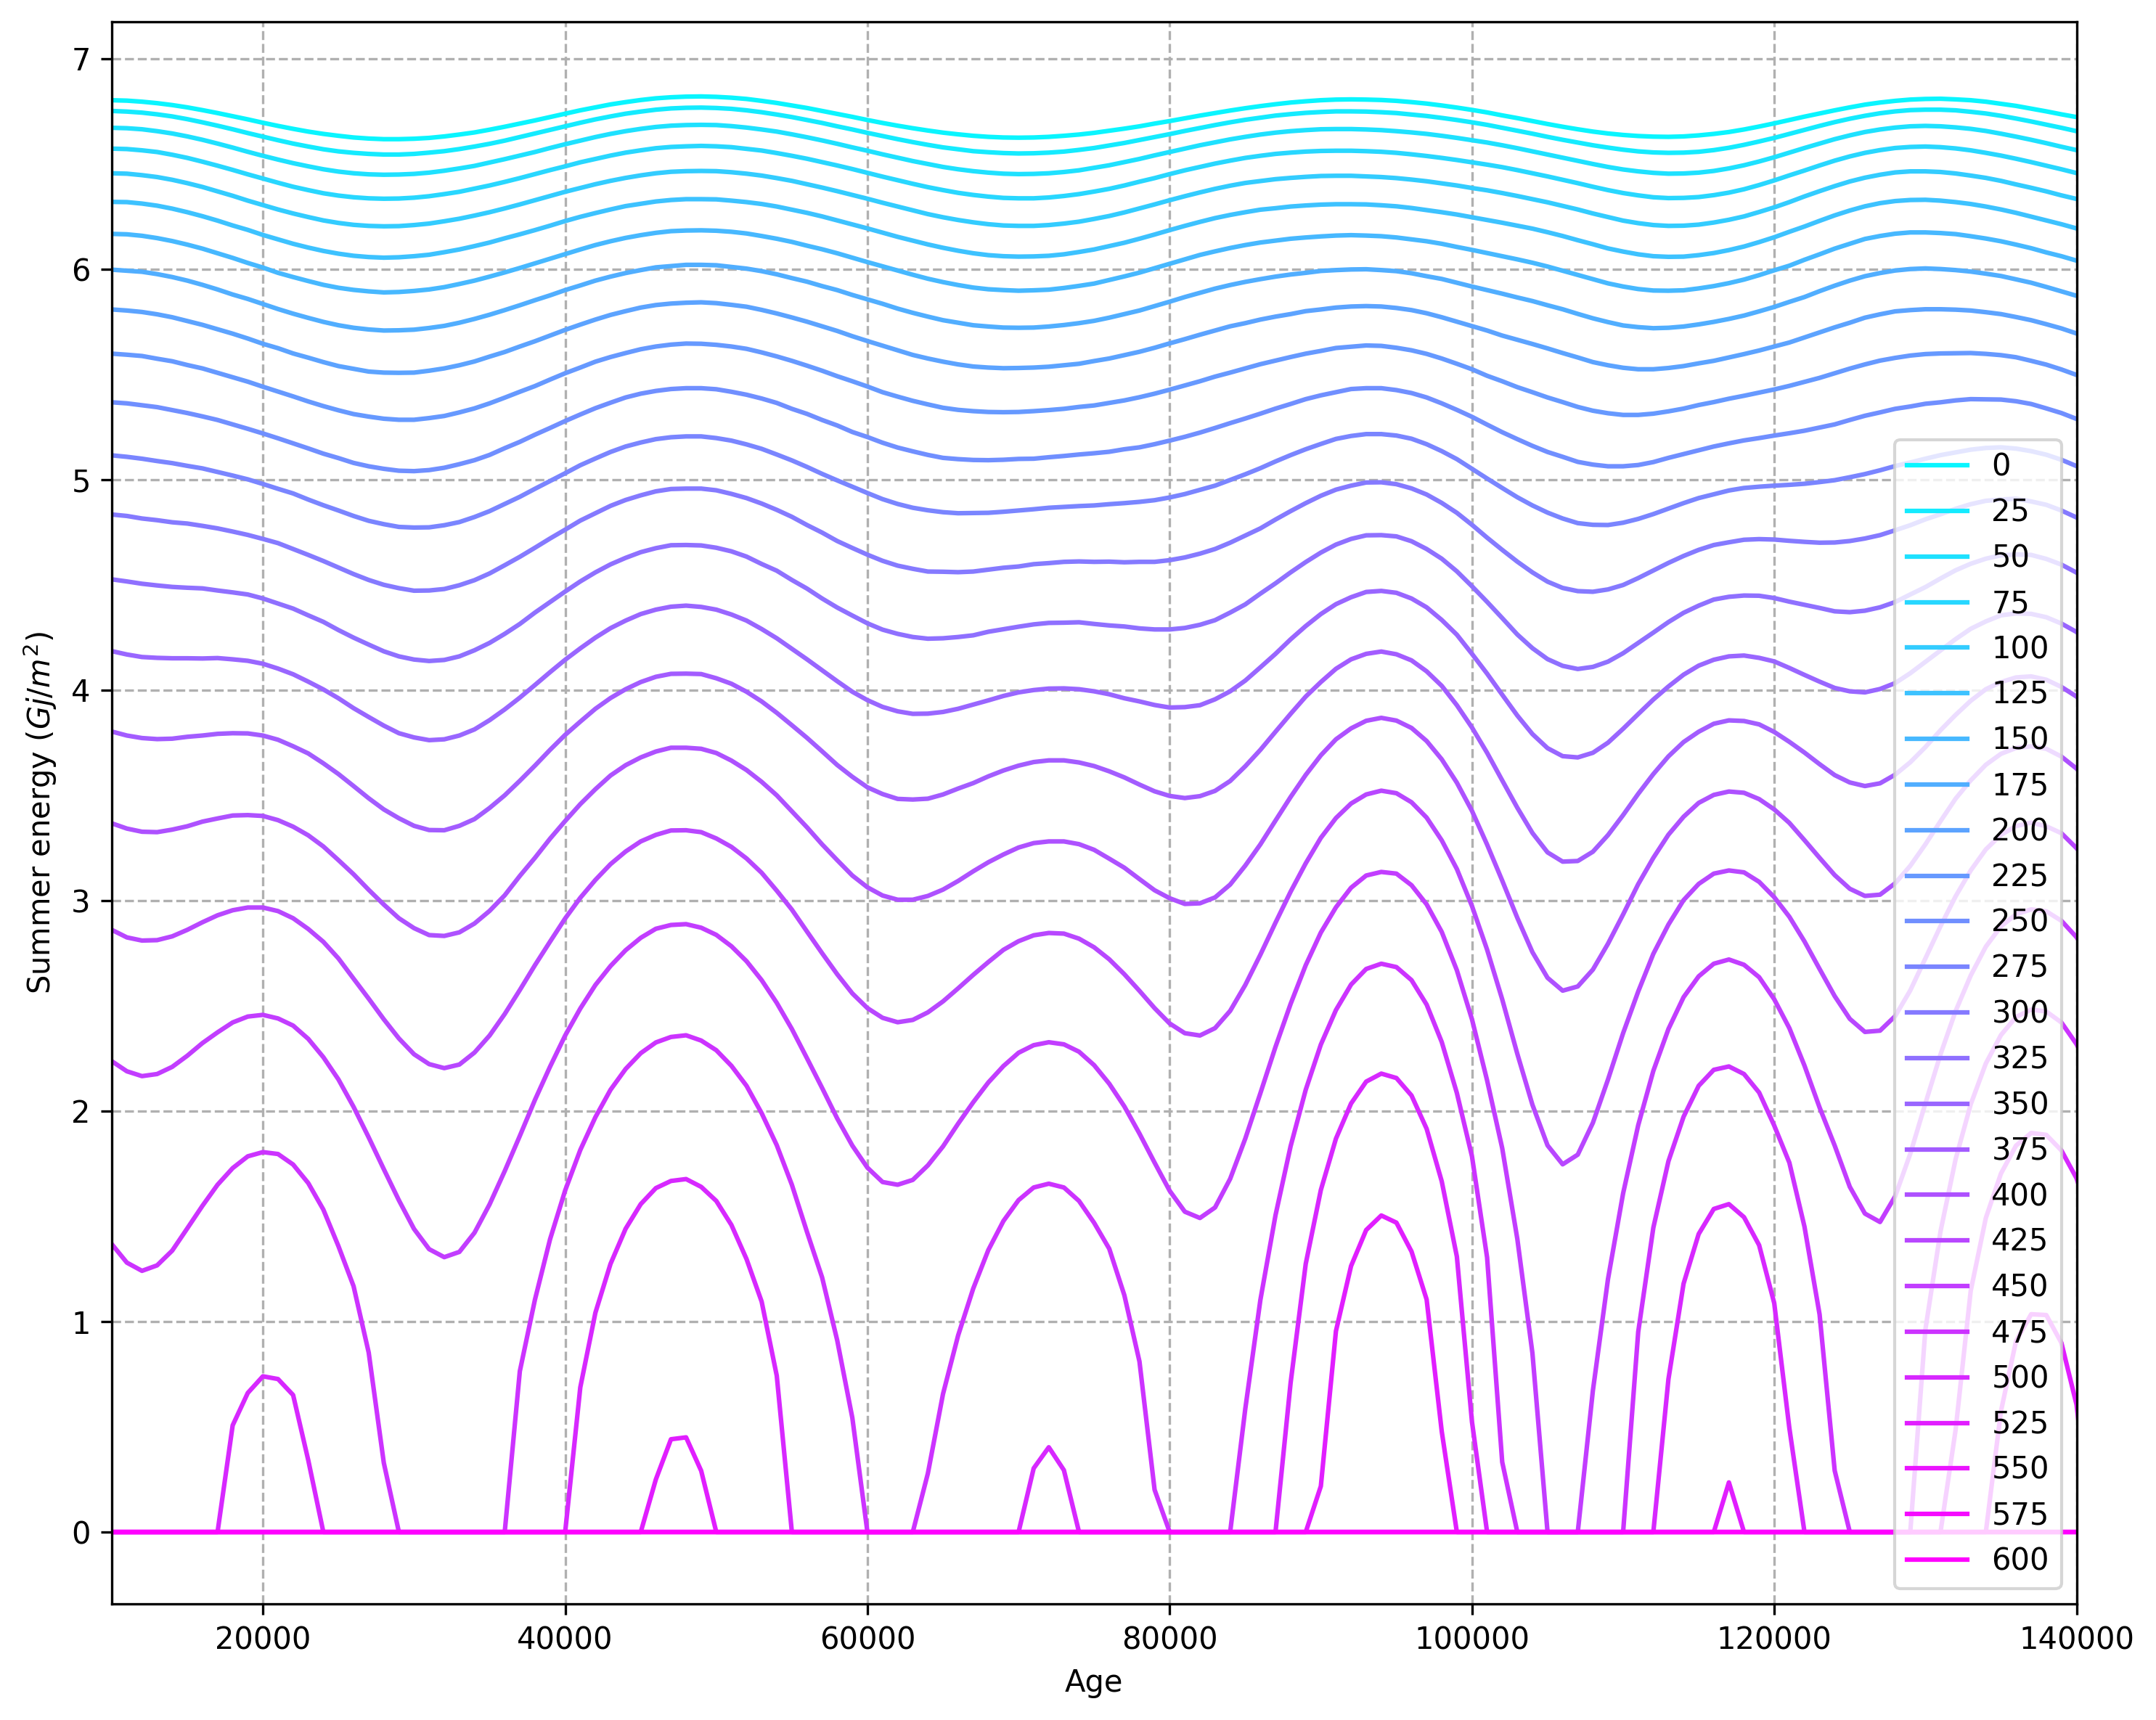

In [43]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_inter_ann is already loaded

fig, ax = plt.subplots(figsize=(10, 8), dpi=300)

# Get the 'bwr' colormap
cmap = plt.cm.cool
# Calculate the step size to use for each column
color_step = 1.0 / (len(df_inter_ann.columns) - 1)

# Loop through the columns in df_inter_ann and plot each one
for idx, column in enumerate(df_inter_ann.columns):
    if column != 'age':
        # Get the color from the colormap
        color = cmap(idx * color_step)
        ax.plot(df_inter_ann['age'], df_inter_ann[column], color=color, label=column)

ax.set_xlabel('Age')
ax.set_ylabel('Summer energy $(Gj/m^2)$')
ax.set_xlim(10000, 140000)  # Set x-axis limits
ax.grid(True, which="both", ls="--", axis="both")

# Add a legend if you want to differentiate between the lines
ax.legend()

plt.tight_layout()
plt.show()


In [18]:
import os
import pandas as pd

# Directory path
dir_path = 'D:\\VScode\\Last_deglaciation\\data_fig3\\all_inso'

# List all .txt files in the directory
all_files = [f for f in os.listdir(dir_path) if f.endswith('.txt')]
# remove 'j_0north.txt' from the list
selected_files=all_files
selected_files.remove('j_0north.txt')

# remove the 'j_90north.txt'
selected_files.remove('j_90north.txt')

# move 'j_5north.txt' to the first place
selected_files.remove('j_5north.txt')
selected_files.insert(0,'j_5north.txt')

#move the 'j_5south.txt' to the second place
selected_files.remove('j_5south.txt')
selected_files.insert(1,'j_5south.txt')



# Create a dictionary to store each processed DataFrame with filename as the key
processed_dataframes = {}

for file in selected_files:
    full_path = os.path.join(dir_path, file)
    # Read the file
    df = pd.read_csv(full_path, sep='\s+', header=0, skiprows=8)
    
    # Process the DataFrame
    df.rename(columns={'NaN': 'age'}, inplace=True)
    df['age'] = df['age'] * 1000
    
    # Store the processed DataFrame in the dictionary
    processed_dataframes[file] = df



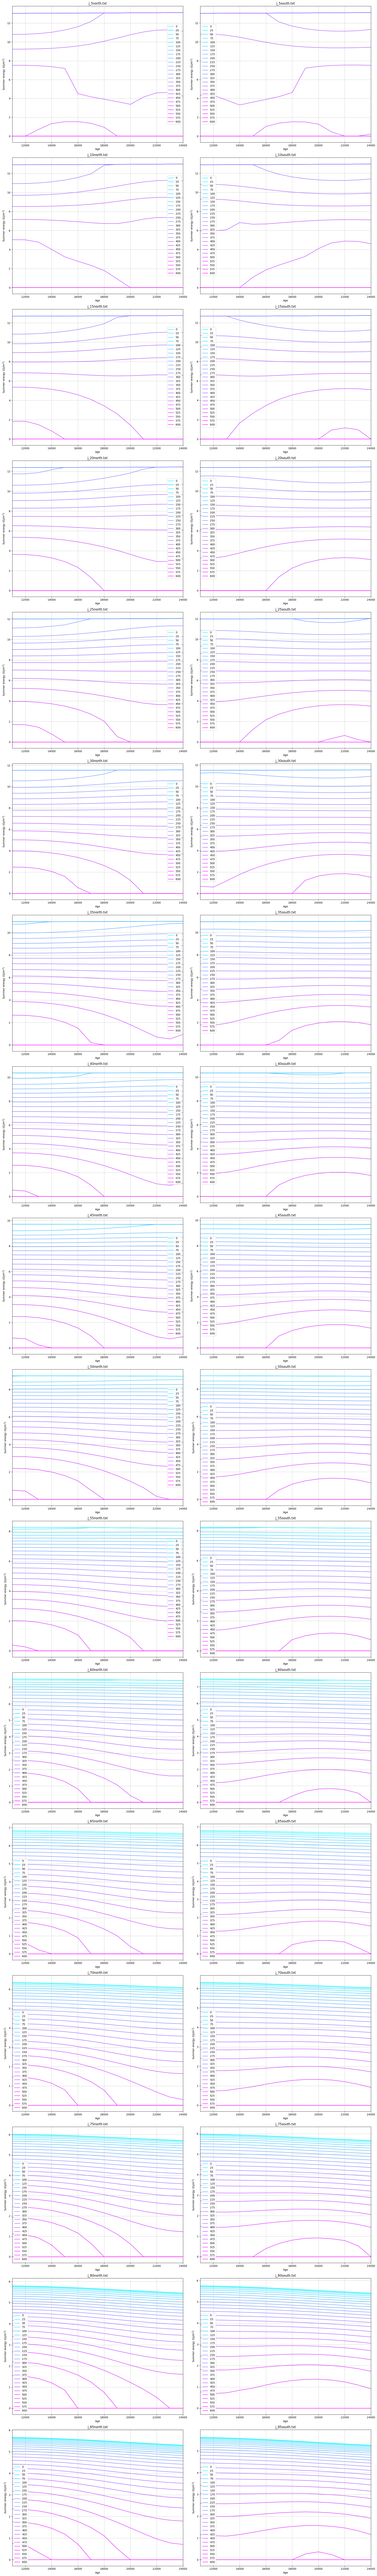

In [19]:
import matplotlib.pyplot as plt

# Number of DataFrames to plot
num_dfs = len(processed_dataframes)

# Calculate the number of rows needed for the given number of DataFrames and two columns
num_rows = (num_dfs + 1) // 2  # This will round up

# Create a new figure with multiple subplots
fig, axes = plt.subplots(num_rows, 2, figsize=(20, 8*num_rows), dpi=100)
# Flatten the axes array for easy iteration
axes = axes.ravel()

# Get the 'bwr' colormap
cmap = plt.cm.cool

# Iterate over the dataframes and their corresponding axes
for ax, (file_name, df) in zip(axes, processed_dataframes.items()):
    # Calculate the step size to use for each column
    color_step = 1.0 / (len(df.columns) - 1)

    # Loop through the columns in the current DataFrame and plot each one
    for idx, column in enumerate(df.columns):
        if column != 'age':
            # Get the color from the colormap
            color = cmap(idx * color_step)
            ax.plot(df['age'], df[column], color=color, label=column)

    ax.set_title(file_name)  # Set the title of each subplot to the filename
    ax.set_xlabel('Age')
    ax.set_ylabel('Summer energy $(Gj/m^2)$')
    ax.set_xlim(11000, 24000)  # Set x-axis limits
    ax.grid(True, which="both", ls="--", axis="both")
    ax.legend()

# If the number of dataframes is odd, we'll hide the last unused axis
if num_dfs % 2 != 0:
    axes[-1].axis('off')

plt.tight_layout()
plt.show()


In [11]:
# Read in the 'lgmr-westerly-position-intensity-u850.xlsx' file
import pandas as pd

path='D:/VScode/Last_deglaciation/data_fig3/'
df_SH_westerly_position = pd.read_excel(path + 'lgmr-westerly-position-intensity-u850.xlsx', sheet_name='position SH', header=0, skiprows=0)
# rename the first and second column to age and position
df_SH_westerly_position.rename(columns={'age (mid-yr BP)':'age', 'position (˚N) --> ensemble member':'position'}, inplace=True)

df_SH_westerly_strength = pd.read_excel(path + 'lgmr-westerly-position-intensity-u850.xlsx', sheet_name='intensity SH', header=0, skiprows=0)
df_SH_westerly_strength.rename(columns={'age (mid-yr BP)':'age', 'position (m/s) --> ensemble member':'strength'}, inplace=True)


obl = pd.read_csv(path+'obliquity_0_500kyr_inter100.txt', sep="\s+", header=None, names=['age', 'obliquity'])
# convert the age from kyr to yr
obl['age']=obl['age']*-1000

In [34]:
df_SH_westerly_position

age  position  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0      100    -51.43      -51.49      -51.30      -51.59      -51.39   
1      300    -51.51      -51.27      -51.34      -51.61      -51.51   
2      500    -51.37      -51.23      -51.06      -51.45      -51.53   
3      700    -51.59      -51.50      -51.33      -51.46      -51.22   
4      900    -51.46      -51.41      -51.59      -51.32      -51.49   
..     ...       ...         ...         ...         ...         ...   
115  23100    -51.92      -52.19      -52.09      -52.02      -51.97   
116  23300    -52.09      -52.24      -52.01      -51.80      -51.85   
117  23500    -52.14      -52.15      -51.90      -51.86      -51.80   
118  23700    -52.10      -52.36      -51.79      -52.09      -51.73   
119  23900    -52.10      -51.86      -51.88      -52.24      -51.29   

     Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 492  \
0        -51.47      -51.66      -51.51      -51.11  ...        -51.57   
1        -51.37      -51.52      -51.26      -51.45  ...        -51.27   
2        -51.45      -51.50      -51.31      -51.19  ...        -51.52   
3        -51.50      -51.29      -51.49      -51.40  ...        -51.32   
4        -51.20      -51.36      -51.35      -51.13  ...        -51.46   
..          ...         ...         ...         ...  ...           ...   
115      -52.42      -52.03      -52.30      -51.85  ...        -51.84   
116      -51.83      -51.76      -52.11      -52.01  ...        -52.24   
117      -52.25      -52.30      -52.08      -52.24  ...        -51.74   
118      -52.15      -51.46      -52.25      -52.17  ...        -52.29   
119      -52.13      -51.91      -52.08      -52.54  ...        -52.13   

     Unnamed: 493  Unnamed: 494  Unnamed: 495  Unnamed: 496  Unnamed: 497  \
0          -51.41        -51.66        -51.18        -51.35        -51.54   
1          -51.30        -51.35        -51.38        -51.41        -51.53   
2          -51.29        -51.44        -51.35        -51.56        -51.34   
3          -51.54        -51.02        -51.24        -51.41        -51.75   
4          -51.41        -51.70        -51.25        -51.13        -51.42   
..            ...           ...           ...           ...           ...   
115        -51.70        -51.58        -51.95        -51.89        -51.33   
116        -51.76        -51.84        -52.05        -52.22        -52.19   
117        -52.02        -51.92        -51.95        -52.01        -51.76   
118        -52.27        -51.97        -51.93        -51.91        -51.71   
119        -52.07        -52.09        -52.15        -52.29        -51.88   

     Unnamed: 498  Unnamed: 499  Unnamed: 500  position_mavg  
0          -51.36        -51.22        -51.32            NaN  
1          -51.50        -51.36        -51.28            NaN  
2          -51.42        -51.05        -51.52            NaN  
3          -51.47        -51.34        -51.36            NaN  
4          -51.45        -51.50        -51.34        -51.408  
..            ...           ...           ...            ...  
115        -52.06        -51.64        -51.96            NaN  
116        -51.96        -51.89        -52.29            NaN  
117        -52.20        -52.09        -52.07            NaN  
118        -52.03        -52.35        -51.55            NaN  
119        -52.20        -52.32        -52.04            NaN  

[120 rows x 502 columns]

In [35]:
df_SH_westerly_strength

age   strength  Unnamed: 2  Unnamed: 3  Unnamed: 4  Unnamed: 5  \
0    100.0  12.908120   12.918610   12.836990   12.864795   12.870535   
1    300.0  12.961411   12.869204   12.763856   12.849005   12.827612   
2    500.0  12.727713   12.840272   12.707029   12.850960   12.750196   
3    700.0  12.898708   12.731449   12.844853   12.767325   12.712741   
4    900.0  12.820617   12.814532   12.841559   12.832027   12.810851   
..     ...        ...         ...         ...         ...         ...   
120    NaN  13.247447   13.290700   13.228584   13.210009   13.109770   
121    NaN  13.448388   13.604282   13.236691   13.277221   13.390412   
122    NaN  13.255274   13.393428   13.273038   13.328359   12.997884   
123    NaN  13.364186   13.442336   13.389551   13.299156   13.430022   
124    NaN  13.354136   13.380413   13.228742   13.447694   13.178133   

     Unnamed: 6  Unnamed: 7  Unnamed: 8  Unnamed: 9  ...  Unnamed: 492  \
0     12.937049   12.910912   12.917846   12.886692  ...     12.921979   
1     12.897397   12.877362   12.810433   12.815228  ...     12.817503   
2     12.772436   12.912795   12.874623   12.774030  ...     12.766335   
3     12.796077   12.874173   12.823008   12.777251  ...     12.839421   
4     12.785783   12.803581   12.866160   12.785509  ...     12.802429   
..          ...         ...         ...         ...  ...           ...   
120   13.355994   13.343419   13.275792   13.573678  ...     13.426500   
121   13.323718   13.386561   13.329387   13.404462  ...     13.001605   
122   13.375186   13.184237   13.197230   13.286065  ...     13.196358   
123   13.287000   13.155760   13.317365   13.439512  ...     13.337977   
124   13.285887   13.171874   13.140707   13.330969  ...     13.140933   

     Unnamed: 493  Unnamed: 494  Unnamed: 495  Unnamed: 496  Unnamed: 497  \
0       12.972896     12.870637     12.916461     12.809327     12.840662   
1       12.806131     12.890603     12.850132     12.875930     12.881336   
2       12.828383     12.845779     12.704900     12.828383     12.776685   
3       12.860928     12.716990     12.818247     12.851753     12.860752   
4       12.912325     12.922785     12.765162     12.669062     12.835992   
..            ...           ...           ...           ...           ...   
120     13.297898     13.174913     13.231441     13.145026     12.991446   
121     13.480971     13.111418     13.313693     13.349754     13.359521   
122     13.230496     13.309117     13.322182     13.436431     13.147598   
123     13.292669     13.110197     13.128823     12.946130     13.209960   
124     13.831856     13.179046     13.300045     13.262600     13.360775   

     Unnamed: 498  Unnamed: 499  Unnamed: 500  strength_mavg  
0       12.873543     12.842689     12.879661            NaN  
1       12.953911     12.952276     12.866507            NaN  
2       12.868827     12.824529     12.788169            NaN  
3       12.912718     12.750861     12.872560            NaN  
4       12.830149     12.863453     12.669695      12.828067  
..            ...           ...           ...            ...  
120     13.240338     13.317293     13.001393            NaN  
121     13.403791     13.381665     13.040809            NaN  
122     13.541615     13.110253     13.090356            NaN  
123     13.272114     13.260757     13.264329            NaN  
124     13.467320     13.169074     13.331911            NaN  

[125 rows x 502 columns]

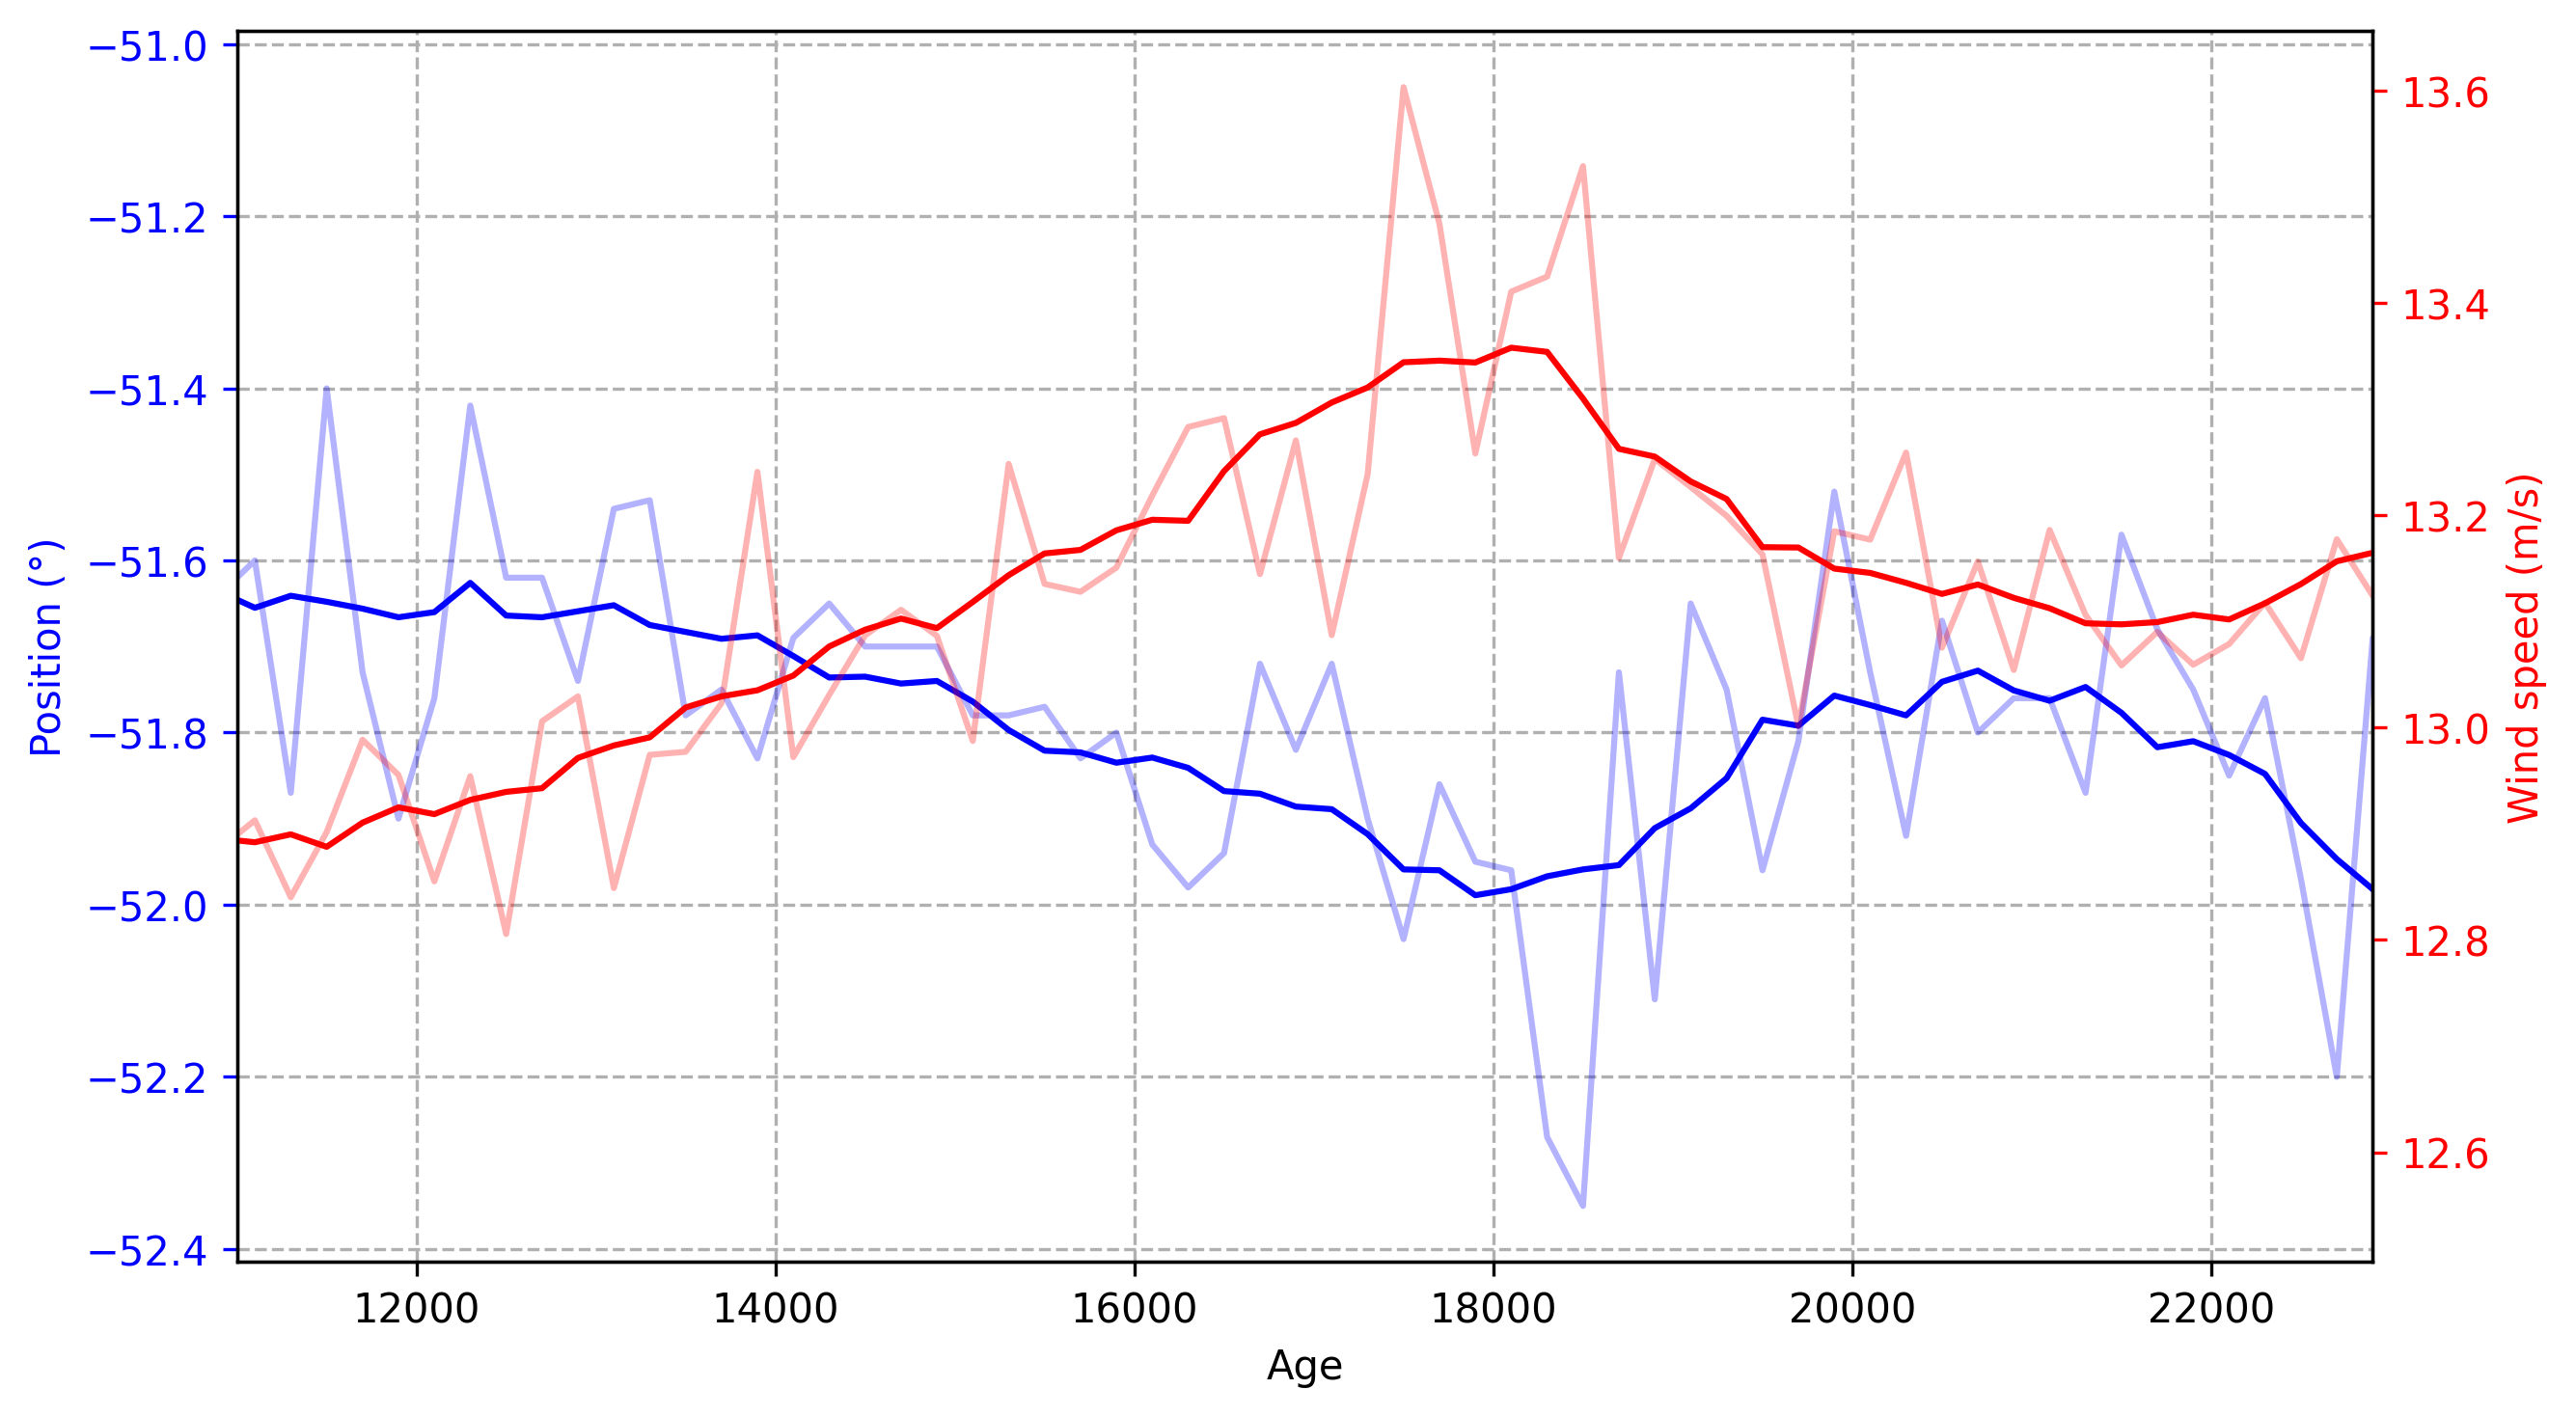

(11000.0, 22900.0)

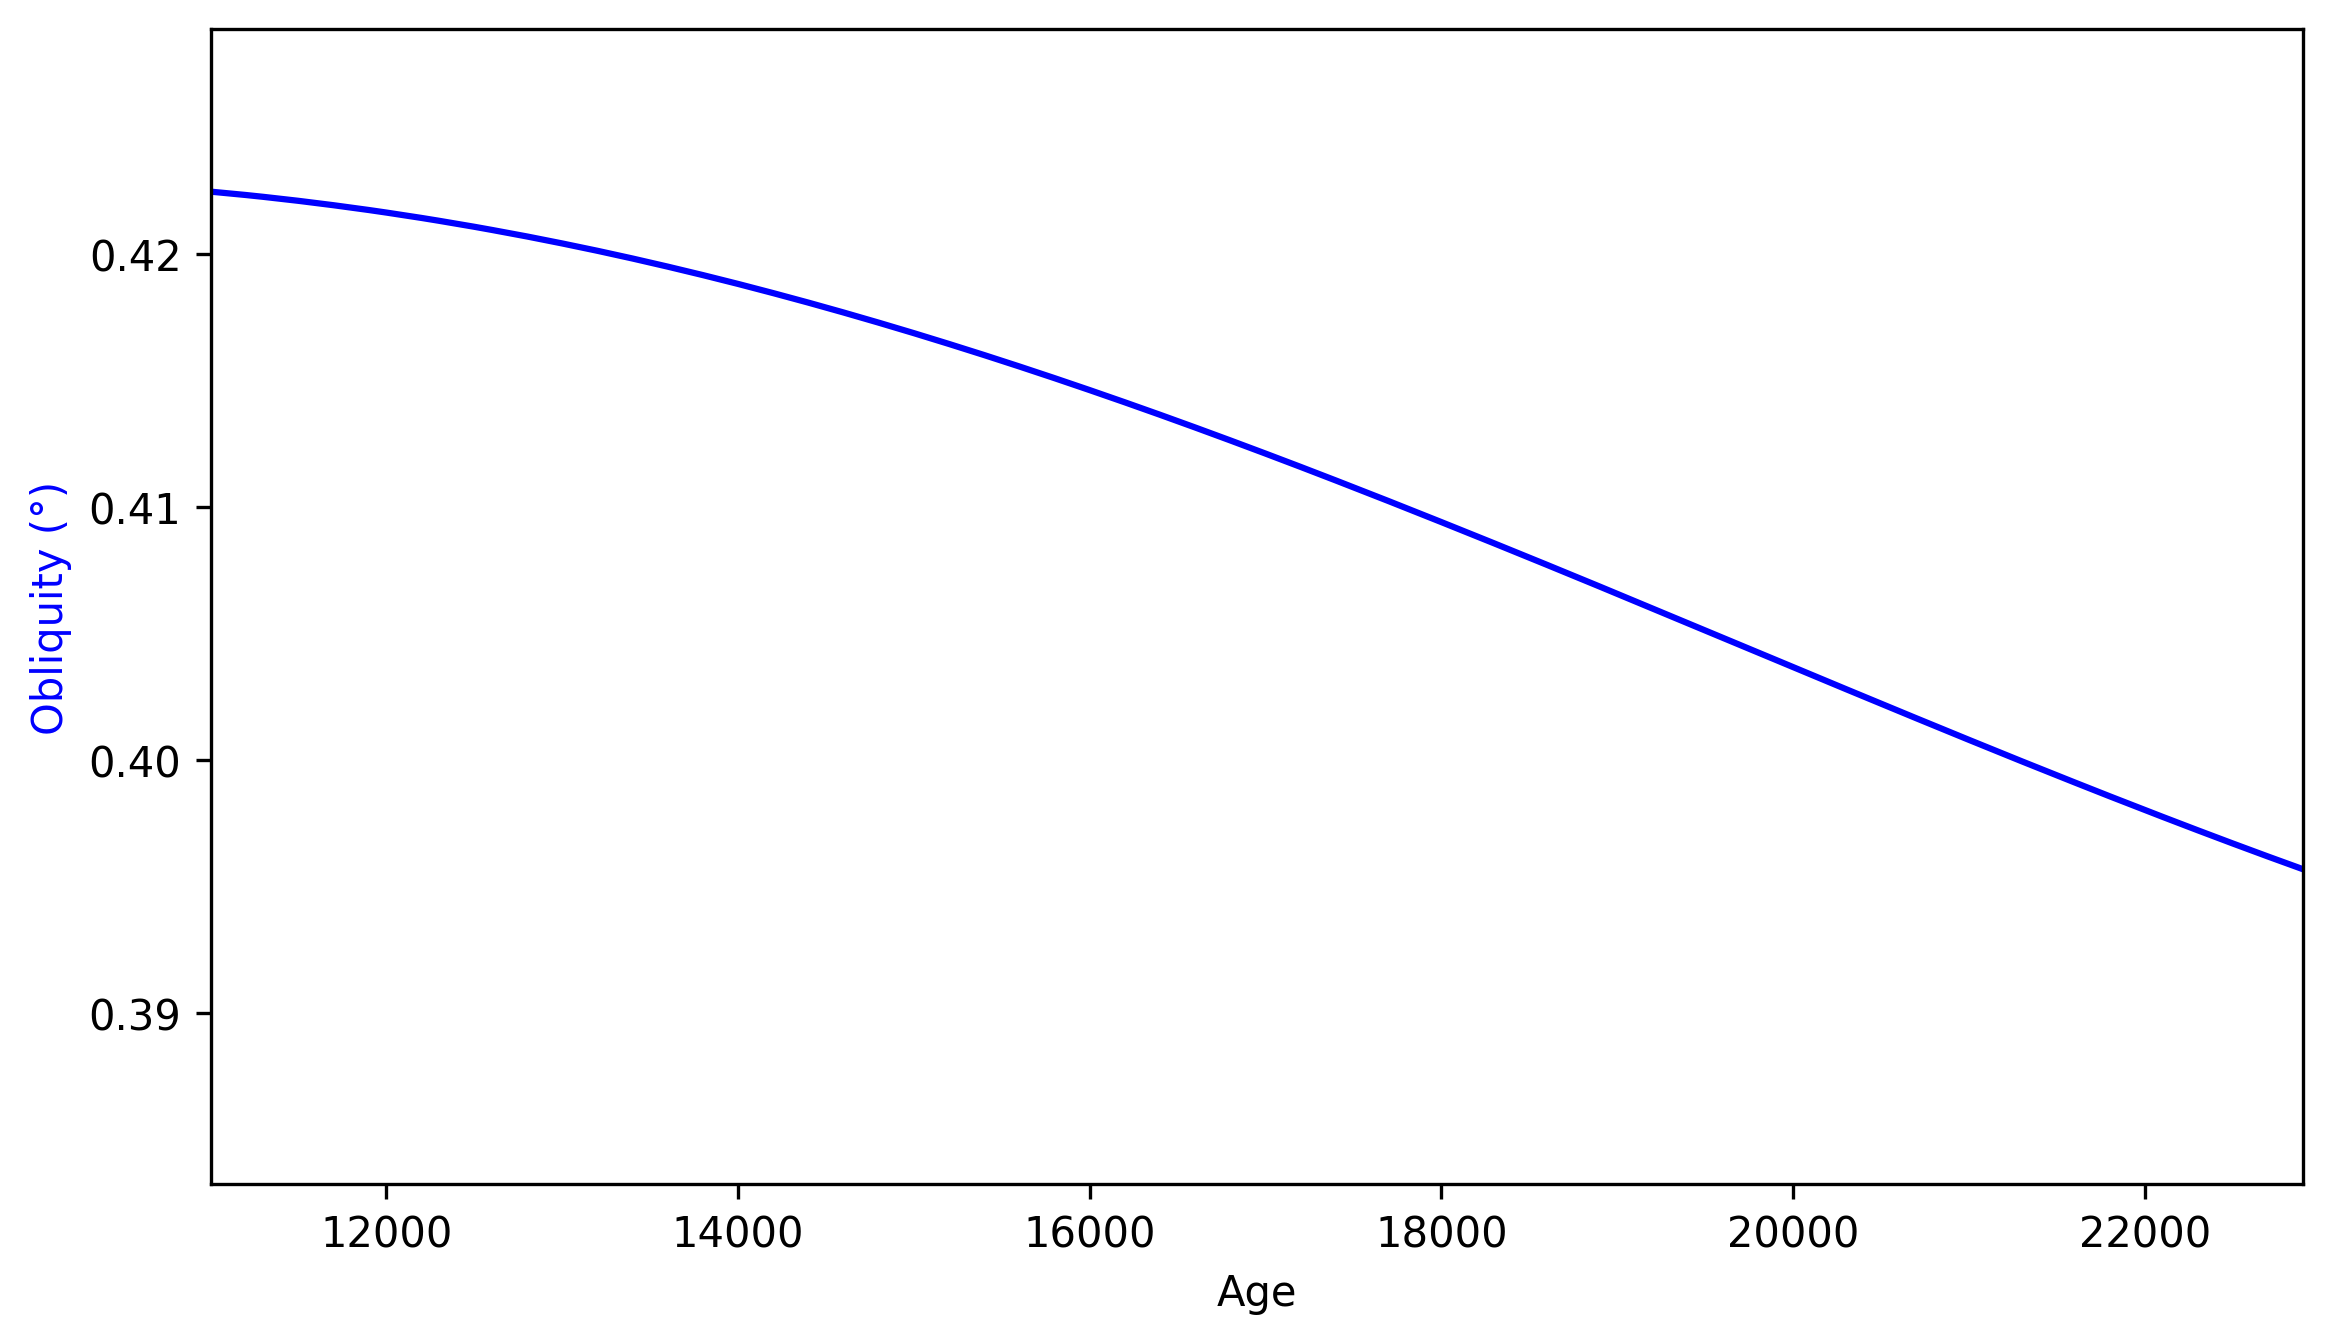

In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_SH_westerly_position and df_SH_westerly_strength are loaded.

# # Calculate a 10-point moving average for each dataset.
# df_SH_westerly_position['position_mavg'] = df_SH_westerly_position['position'].rolling(window=10).mean()
# df_SH_westerly_strength['strength_mavg'] = df_SH_westerly_strength['strength'].rolling(window=10).mean()

# Calculate a 10-point moving average for each dataset and shift by half window size.
half_window = 5
df_SH_westerly_position['position_mavg'] = df_SH_westerly_position['position'].rolling(window=10).mean().shift(-half_window)
df_SH_westerly_strength['strength_mavg'] = df_SH_westerly_strength['strength'].rolling(window=10).mean().shift(-half_window)


# Plot
fig, ax = plt.subplots(figsize=(9, 5), dpi=300)

# Plot the original data with a lower alpha for a translucent effect
ax.plot(df_SH_westerly_position['age'], df_SH_westerly_position['position'], color='b', label='position', alpha=0.3)
ax.plot(df_SH_westerly_position['age'], df_SH_westerly_position['position_mavg'], color='b', label='position (10-pt mavg)')
ax.set_xlabel('Age')
ax.set_ylabel('Position (°)', color='b')
# Set the y-tick label to be its current absolute value
# ax.set_yticklabels(np.abs(ax.get_yticks()))
ax.tick_params('y', colors='b')
# ax.set_xlim(11000, 22900)  # Set x-axis limits
ax.grid(True, which="both", ls="--", axis="both")

# Add a second y-axis
ax2 = ax.twinx()
ax2.plot(df_SH_westerly_strength['age'], df_SH_westerly_strength['strength'], color='r', label='strength', alpha=0.3)
ax2.plot(df_SH_westerly_strength['age'], df_SH_westerly_strength['strength_mavg'], color='r', label='strength (10-pt mavg)')
ax2.set_ylabel('Wind speed (m/s)', color='r')
ax2.tick_params('y', colors='r')
ax2.set_xlim(11000, 22900)  # Set x-axis limits

plt.tight_layout()
plt.show()

# plot a figure of the obl
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9, 5), dpi=300)

ax.plot(obl['age'], obl['obliquity'], color='b', label='obliquity')
ax.set_xlabel('Age')
ax.set_ylabel('Obliquity (°)', color='b')
ax.set_xlim(11000, 22900)  # Set x-axis limits


In [69]:
processed_dataframes['j_0north.txt']

age       0      25      50      75     100     125     150     175  \
0           0  13.120  13.120  13.120  13.120  13.120  13.120  13.120  13.120   
1        1000  13.114  13.114  13.114  13.114  13.114  13.114  13.114  13.114   
2        2000  13.108  13.108  13.108  13.108  13.108  13.108  13.108  13.108   
3        3000  13.103  13.103  13.103  13.103  13.103  13.103  13.103  13.103   
4        4000  13.098  13.098  13.098  13.098  13.098  13.098  13.098  13.098   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
4996  4996000  13.159  13.159  13.159  13.159  13.159  13.159  13.159  13.159   
4997  4997000  13.161  13.161  13.161  13.161  13.161  13.161  13.161  13.161   
4998  4998000  13.163  13.163  13.163  13.163  13.163  13.163  13.163  13.163   
4999  4999000  13.164  13.164  13.164  13.164  13.164  13.164  13.164  13.164   
5000  5000000  13.164  13.164  13.164  13.164  13.164  13.164  13.164  13.164   

         200  ...     375     400    425    450  475  500  525  550  575  600  
0     13.120  ...  13.120  10.609  5.277  0.000  0.0  0.0  0.0  0.0  0.0  0.0  
1     13.114  ...  13.114  10.546  5.321  0.000  0.0  0.0  0.0  0.0  0.0  0.0  
2     13.108  ...  13.108  10.557  5.012  0.000  0.0  0.0  0.0  0.0  0.0  0.0  
3     13.103  ...  13.103  10.640  4.128  0.000  0.0  0.0  0.0  0.0  0.0  0.0  
4     13.098  ...  13.098  10.820  3.500  0.000  0.0  0.0  0.0  0.0  0.0  0.0  
...      ...  ...     ...     ...    ...    ...  ...  ...  ...  ...  ...  ...  
4996  13.159  ...  13.159  10.459  4.118  1.432  0.0  0.0  0.0  0.0  0.0  0.0  
4997  13.161  ...  13.161  10.325  5.057  0.549  0.0  0.0  0.0  0.0  0.0  0.0  
4998  13.163  ...  13.163  10.250  6.446  0.000  0.0  0.0  0.0  0.0  0.0  0.0  
4999  13.164  ...  13.164  10.224  7.049  0.000  0.0  0.0  0.0  0.0  0.0  0.0  
5000  13.164  ...  13.164  10.237  6.846  0.000  0.0  0.0  0.0  0.0  0.0  0.0  

[5001 rows x 26 columns]

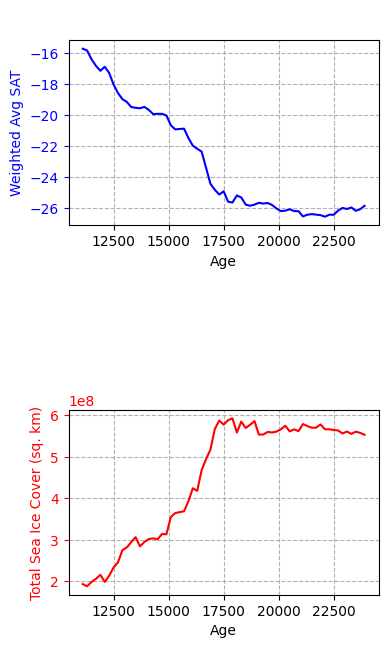

In [46]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Assuming you've already computed weighted_avg_sat and total_sea_ice_cover as mentioned before

# Create a new figure
fig, main_ax = plt.subplots(figsize=(4,8), dpi=100)
main_ax.axis('off')  # Turn off the main axis

# Create the inset for the Weighted Avg SAT plot
ax1 = inset_axes(main_ax, width='100%', height='100%', 
                 bbox_to_anchor=(0.05, 0.65, 1, 0.3), 
                 bbox_transform=main_ax.transAxes, borderpad=0)
ax1.plot(weighted_avg_sat['age'], weighted_avg_sat, 'b-', label="Weighted Avg SAT")
ax1.set_xlabel('Age')
ax1.set_ylabel('Weighted Avg SAT', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(True, which="both", ls="--", axis="both")

# Create the inset for the Total Sea Ice Cover plot
ax2 = inset_axes(main_ax, width='100%', height='100%', 
                 bbox_to_anchor=(0.05, 0.05, 1, 0.3), 
                 bbox_transform=main_ax.transAxes, borderpad=0)
ax2.plot(total_sea_ice_cover['age'], total_sea_ice_cover, 'r-', label="Total Sea Ice Cover")
ax2.set_xlabel('Age')
ax2.set_ylabel('Total Sea Ice Cover (sq. km)', color='r')
ax2.tick_params('y', colors='r')
ax2.grid(True, which="both", ls="--", axis="both")


plt.show()


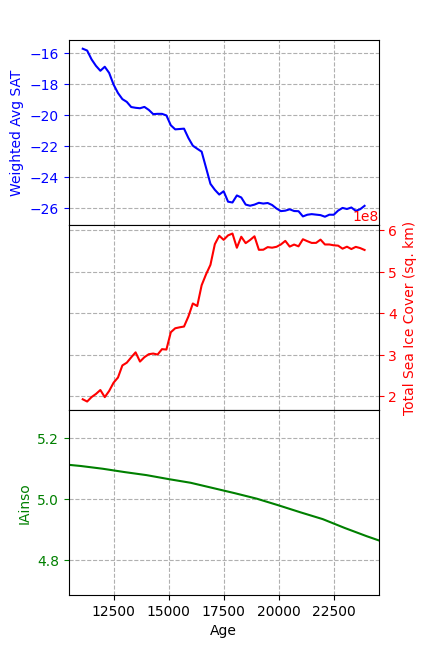

In [49]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Assuming you've already computed weighted_avg_sat, total_sea_ice_cover, and IAinso

# Create a new figure
fig, main_ax = plt.subplots(figsize=(4, 8), dpi=100)
main_ax.axis('off')  # Turn off the main axis

# Create the inset for the Weighted Avg SAT plot
ax1 = inset_axes(main_ax, width='100%', height='100%', 
                 bbox_to_anchor=(0.05, 0.65, 1, 0.3), 
                 bbox_transform=main_ax.transAxes, borderpad=0)
ax1.plot(weighted_avg_sat['age'], weighted_avg_sat, 'b-', label="Weighted Avg SAT")
ax1.set_xlabel('Age')
ax1.set_ylabel('Weighted Avg SAT', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(True, which="both", ls="--", axis="both")

# Create the inset for the Total Sea Ice Cover plot
ax2 = inset_axes(main_ax, width='100%', height='100%', 
                 bbox_to_anchor=(0.05, 0.35, 1, 0.3), 
                 bbox_transform=main_ax.transAxes, borderpad=0)
ax2.plot(total_sea_ice_cover['age'], total_sea_ice_cover, 'r-', label="Total Sea Ice Cover")
ax2.set_xlabel('Age')
ax2.set_ylabel('Total Sea Ice Cover (sq. km)', color='r')
ax2.tick_params('y', colors='r')
ax2.grid(True, which="both", ls="--", axis="both")
# show y-label on the right side
ax2.yaxis.set_label_position("right")
# show ytick and yticklabel on the right side
ax2.yaxis.tick_right()


# Create the inset for the IAinso data
ax3 = inset_axes(main_ax, width='100%', height='100%', 
                 bbox_to_anchor=(0.05, 0.05, 1, 0.3), 
                 bbox_transform=main_ax.transAxes, borderpad=0)
ax3.plot(IAinso[:, 0], IAinso[:, 1], 'g-', label="IAinso")  # Assuming IAinso's first column is 'age' and second is the data
ax3.set_xlabel('Age')
ax3.set_ylabel('Intergrated Annual Insolation, T=275', color='g')
ax3.tick_params('y', colors='g')
ax3.grid(True, which="both", ls="--", axis="both")
ax3.set_xlim(ax1.get_xlim())  # Set x-axis limits same as ax1

plt.show()


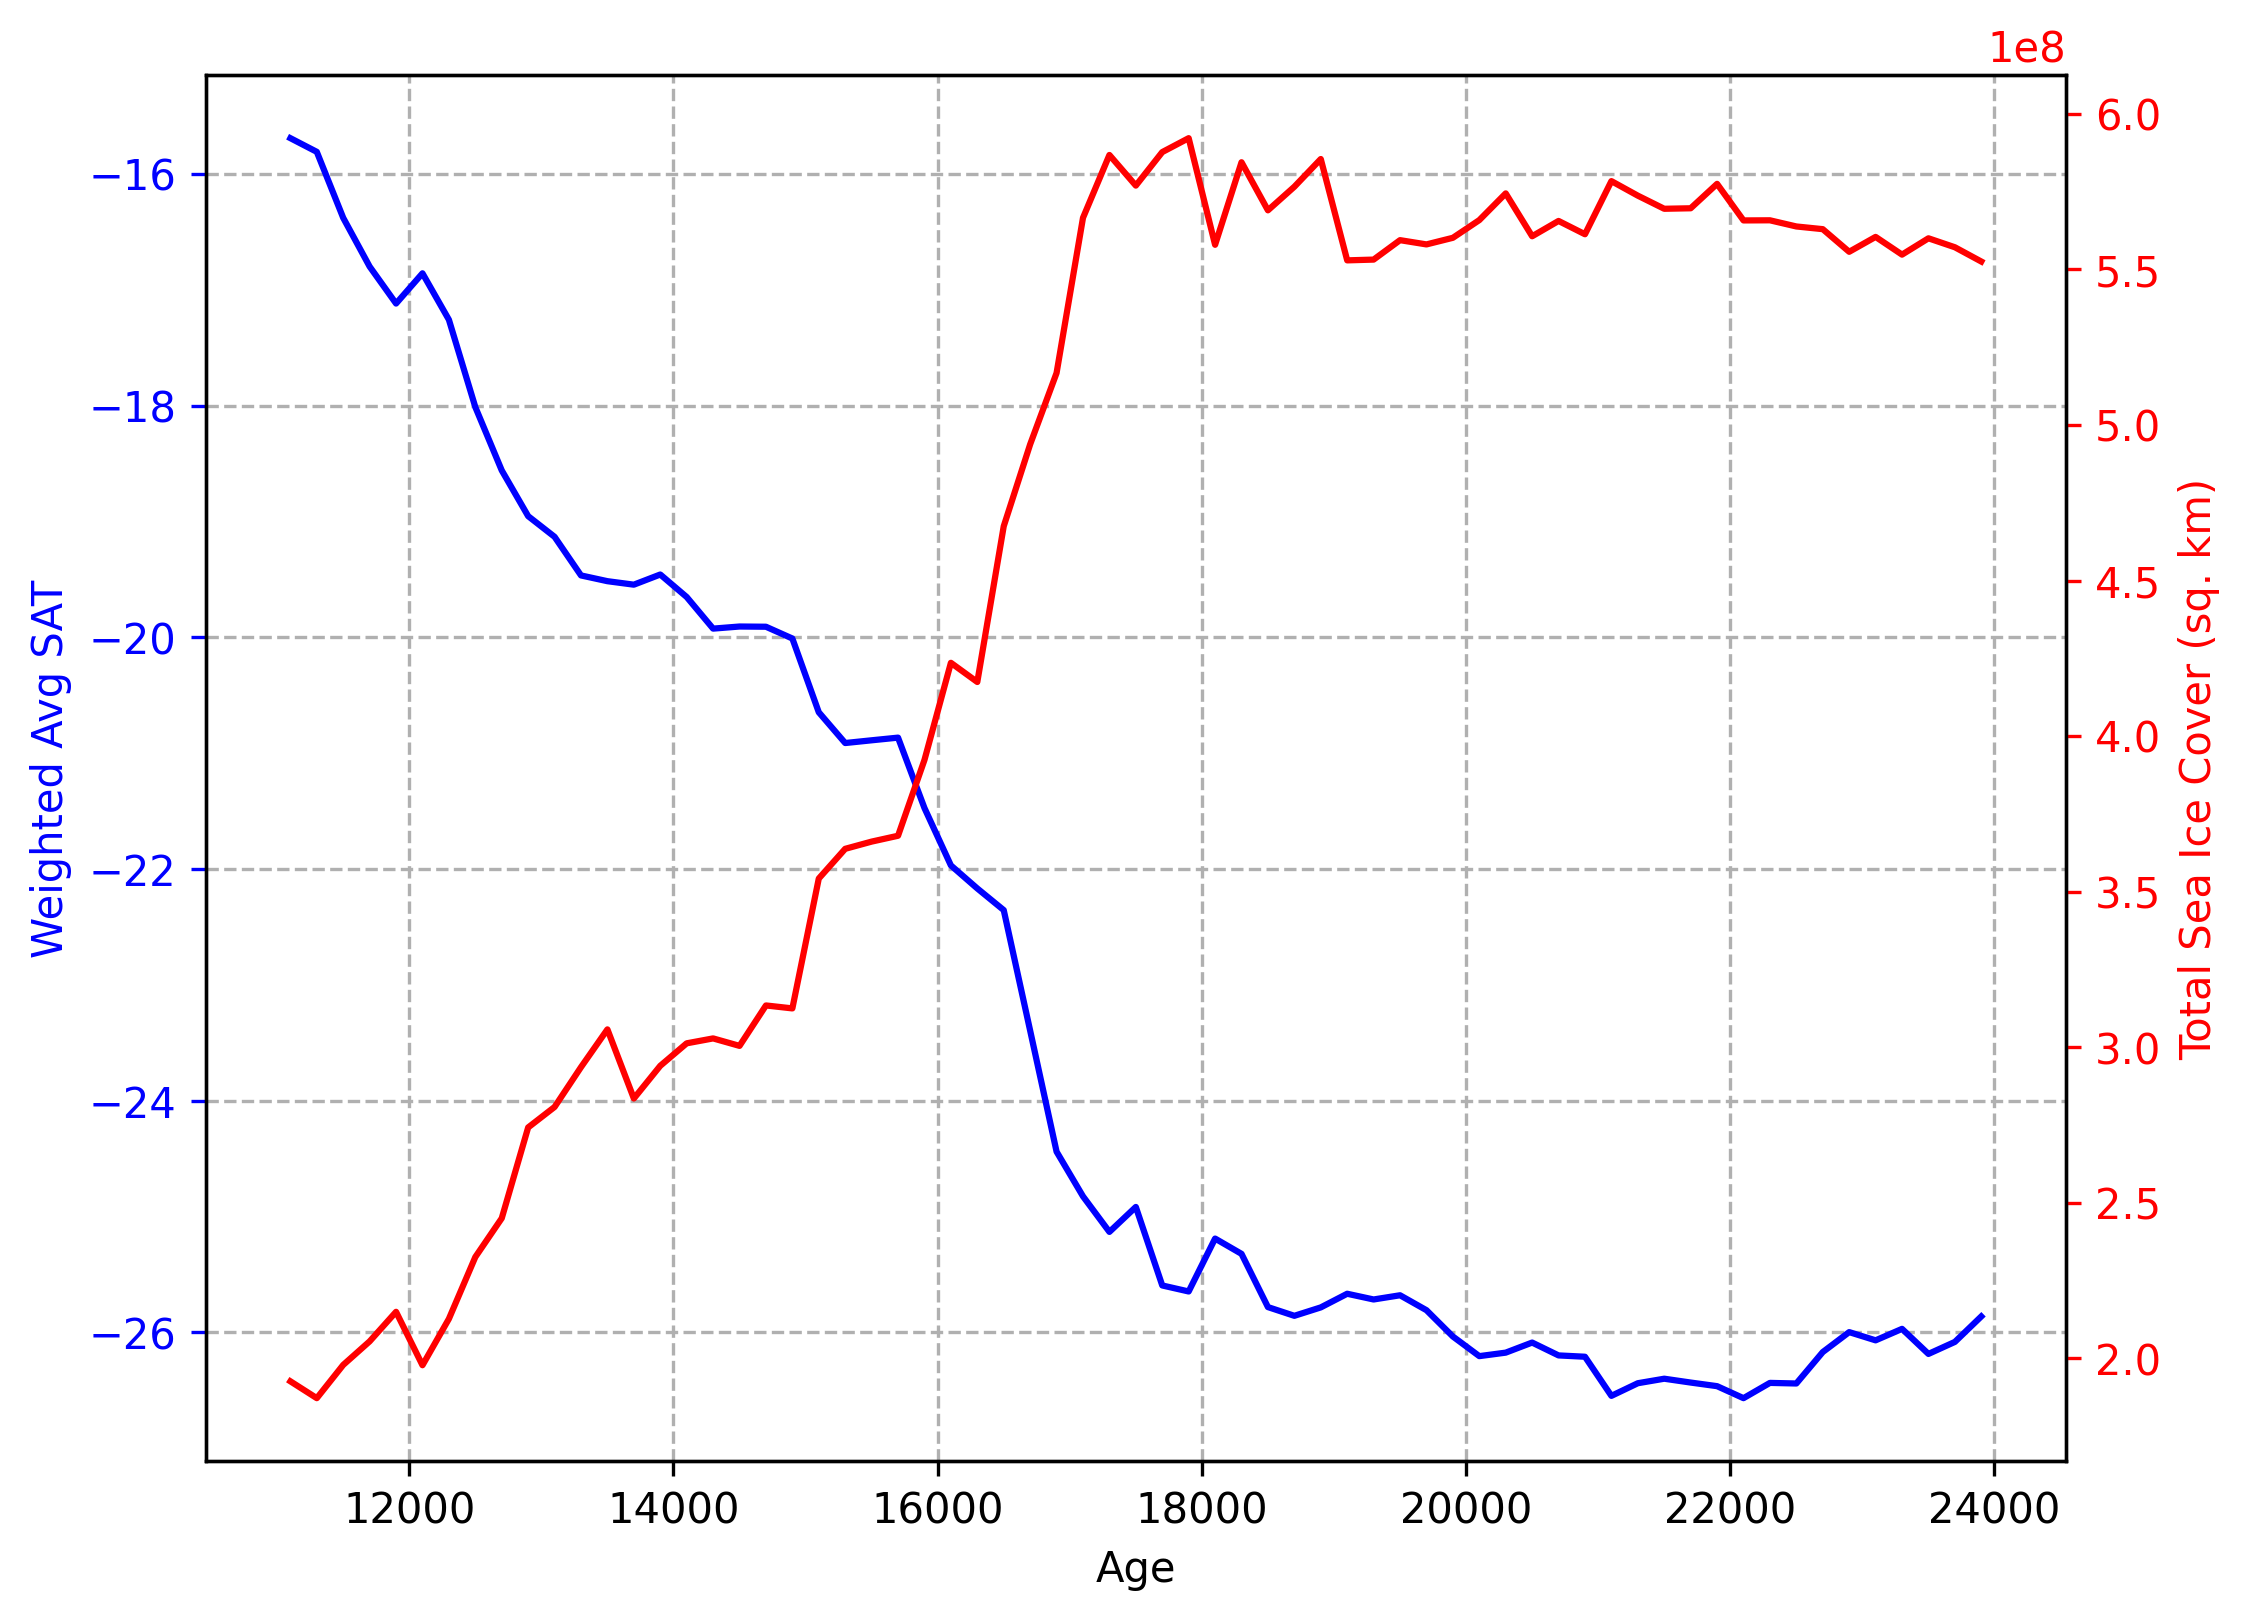

In [11]:
import matplotlib.pyplot as plt

# Assuming you've already computed weighted_avg_sat and total_sea_ice_cover as mentioned before

# Create a new figure and axis
fig, ax1 = plt.subplots(figsize=(8, 6),dpi=300)

# Plot weighted_avg_sat on the primary y-axis
ax1.plot(weighted_avg_sat['age'], weighted_avg_sat, 'b-', label="Weighted Avg SAT")
ax1.set_xlabel('Age')
ax1.set_ylabel('Weighted Avg SAT', color='b')
ax1.tick_params('y', colors='b')
ax1.grid(True, which="both", ls="--", axis="both")
# ax1.legend(loc="upper left")

# Create a second y-axis to plot total_sea_ice_cover
ax2 = ax1.twinx()
ax2.plot(total_sea_ice_cover['age'], total_sea_ice_cover, 'r-', label="Total Sea Ice Cover")
ax2.set_ylabel('Total Sea Ice Cover (sq. km)', color='r')
ax2.tick_params('y', colors='r')
# ax2.legend(loc="upper right")

# Set the title and show the plot
# plt.title('Comparison of Weighted Avg SAT and Total Sea Ice Cover')
# plt.grid(True, which="both", ls="--")

plt.show()
